In [76]:
import pandas as pd

In [77]:
data = pd.read_csv('mortality_status.csv')


In [78]:
data.head(15)


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4,1,1,24.0,1,60,1
1,50,1,1,1,2,0,2,1,35,1,1,14.0,5,62,1
2,58,1,2,2,4,0,2,1,63,1,1,14.0,7,75,1
3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,84,1
4,47,1,1,0,1,1,3,1,41,1,1,3.0,1,50,1
5,51,1,0,0,0,0,2,1,20,1,1,18.0,2,89,1
6,51,1,0,0,0,3,1,1,8,1,1,11.0,1,54,1
7,40,1,1,0,1,0,2,1,30,1,1,9.0,1,14,0
8,40,1,3,2,4,1,3,1,103,1,1,20.0,18,70,1
9,69,1,3,2,4,3,1,0,32,1,1,21.0,12,92,1


In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3984 non-null   int64  
 1   Sex                     3984 non-null   int64  
 2   T_Stage                 3984 non-null   int64  
 3   N_Stage                 3984 non-null   int64  
 4   6th_Stage               3984 non-null   int64  
 5   Differentiated          3984 non-null   int64  
 6   Grade                   3984 non-null   int64  
 7   A_Stage                 3984 non-null   int64  
 8   Tumor_Size              3984 non-null   int64  
 9   Estrogen_Status         3984 non-null   int64  
 10  Progesterone_Status     3984 non-null   int64  
 11  Regional_Node_Examined  3984 non-null   float64
 12  Reginol_Node_Positive   3984 non-null   int64  
 13  Survival_Months         3984 non-null   int64  
 14  Mortality_Status        3984 non-null   

In [80]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


In [81]:
# Selecting relevant feature columns from the dataset to use as input (independent variables)
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
                'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive','Survival_Months']

# Extract the input features (X) using the selected columns
X = data[feature_cols]

# Extract the target variable (y), which indicates mortality status (Alive | Dead)
y = data['Mortality_Status']

In [82]:
# Import the function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
# - test_size=0.2: 20% of the data will be used for testing
# - stratify=y: ensures the class distribution is preserved in both train and test sets
# - random_state=42: ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [83]:
print('Whole Data shape', data.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (3984, 15)
X_train shape (3187, 14)
X_test shape (797, 14)


In [84]:
from sklearn.linear_model import LogisticRegression


In [85]:
logreg = LogisticRegression(max_iter=10000)


In [86]:
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [87]:
y_pred_train = logreg.predict(X_train)


In [88]:
y_pred = logreg.predict(X_test)


In [89]:
Comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Comparison_df


,Actual,Predicted
2583,1,1
1101,1,1
3645,1,1
2354,1,1
705,0,1
...,...,...
991,1,1
1589,1,1
3725,1,1
1694,1,1


In [90]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)
print("The accuracy is: ", accuracy)


The accuracy is:  0.8967681204894885


In [91]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy is: ", accuracy)


The accuracy is:  0.8971141781681304


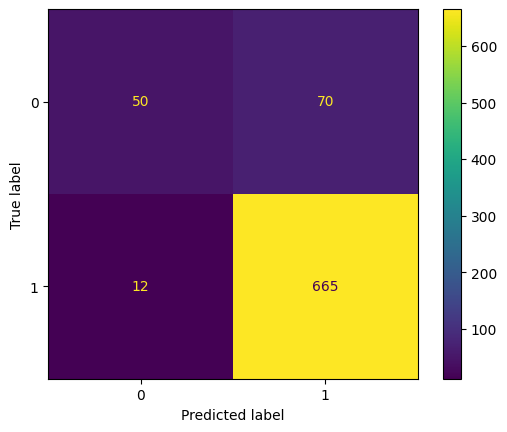

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.42      0.55       120
           1       0.90      0.98      0.94       677

    accuracy                           0.90       797
   macro avg       0.86      0.70      0.75       797
weighted avg       0.89      0.90      0.88       797



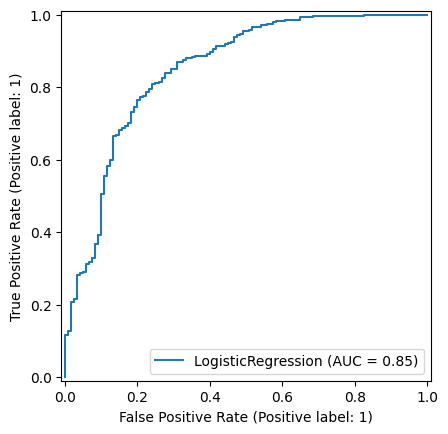

In [94]:
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)


In [95]:
from sklearn.neighbors import KNeighborsClassifier


In [96]:
knn = KNeighborsClassifier(n_neighbors=5)


In [97]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [98]:
knn.predict(X_test)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,